In [37]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [38]:
athlete=pd.read_csv("olympics/athlete_events.csv")
noc=pd.read_csv("olympics/noc_regions.csv")

In [39]:
athlete.head()
aux=athlete.copy()

In [40]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [41]:
athlete.shape

(271116, 15)

In [42]:
noc.shape

(230, 3)

In [43]:
athlete.drop(["Name","ID","Sex","Team","Games","City","Year","Event","Season","Medal"],axis=1,inplace=True)

In [44]:
athlete.head()

,Age,Height,Weight,NOC,Sport
0,24.0,180.0,80.0,CHN,Basketball
1,23.0,170.0,60.0,CHN,Judo
2,24.0,NaN,NaN,DEN,Football
3,34.0,NaN,NaN,DEN,Tug-Of-War
4,21.0,185.0,82.0,NED,Speed Skating


In [45]:
athlete.dropna(inplace=True)    

In [46]:
athlete.head()

,Age,Height,Weight,NOC,Sport
0,24.0,180.0,80.0,CHN,Basketball
1,23.0,170.0,60.0,CHN,Judo
4,21.0,185.0,82.0,NED,Speed Skating
5,21.0,185.0,82.0,NED,Speed Skating
6,25.0,185.0,82.0,NED,Speed Skating


In [11]:
def medals(x):
    if x == 'Bronze':
        return 3
    elif x == 'Gold':
        return 1
    else:
        return  2
athlete["Medal"]=athlete["Medal"].map(medals)

In [47]:
athlete.head()

,Age,Height,Weight,NOC,Sport
0,24.0,180.0,80.0,CHN,Basketball
1,23.0,170.0,60.0,CHN,Judo
4,21.0,185.0,82.0,NED,Speed Skating
5,21.0,185.0,82.0,NED,Speed Skating
6,25.0,185.0,82.0,NED,Speed Skating


In [48]:
athlete=athlete.groupby(["NOC","Sport"]).mean().reset_index()

In [49]:
athlete.head()

,NOC,Sport,Age,Height,Weight
0,AFG,Athletics,21.411765,172.117647,62.764706
1,AFG,Boxing,21.600000,166.400000,56.600000
2,AFG,Judo,24.333333,173.000000,78.333333
3,AFG,Taekwondo,24.500000,184.500000,65.500000
4,AFG,Wrestling,25.040000,167.880000,68.920000


In [50]:
X=athlete.drop(columns=["NOC","Sport"])
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

VAMOS A HACER PCA PARA TRATAR DE DETERMINAR CUANTOS GRUPOS SE PODRIAN ENCONTRAR

In [52]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [53]:
pca.explained_variance_ratio_.cumsum()

array([0.62203999, 0.91021705])

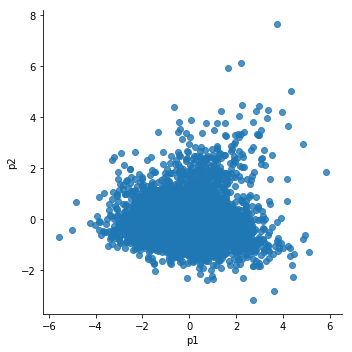

In [54]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [57]:
mds=MDS(n_components=2)

In [58]:
Xm=pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

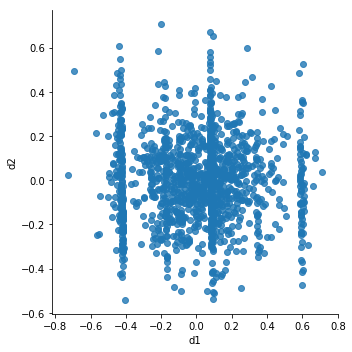

In [22]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [23]:
lst_in =[]
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

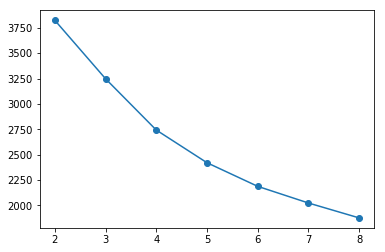

In [24]:
plt.plot(range(2,9),lst_in,marker='o')

In [25]:
km = KMeans(n_clusters=5)

In [26]:
km.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
athlete.describe()

,Age,Height,Weight,Medal
count,1310.000000,1310.000000,1310.000000,1310.000000
mean,25.827442,176.047776,72.857750,2.164014
std,3.924730,8.260982,12.358464,0.513773
min,15.000000,149.000000,40.000000,1.000000
25%,23.545455,170.666667,65.000000,1.909091
50%,25.500000,176.000000,72.000000,2.090909
75%,27.333333,180.912500,79.586364,2.500000
max,52.000000,207.000000,145.000000,3.000000


In [28]:
Xs['km']=km.predict(Xs)
Xs['noc']=aux['NOC']

In [29]:
Xs.groupby('km').mean()

,Age,Height,Weight,Medal
km,,,,
0,-0.108163,0.008627,-0.068569,-0.842995
1,2.297183,-0.034491,0.039775,-0.000569
2,-0.590583,-1.233787,-1.096752,0.160007
3,-0.237424,0.121086,-0.013692,0.862627
4,0.131198,1.341988,1.474007,0.092119


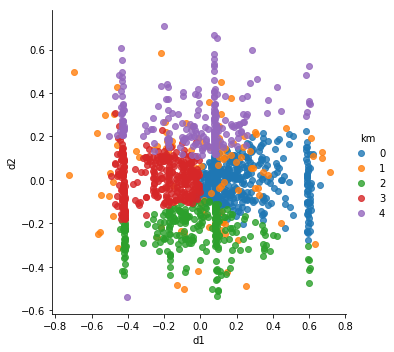

In [31]:
Xm['km']=km.predict(sc.transform(X))

sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='km')

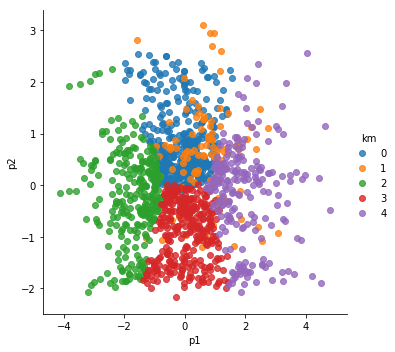

In [32]:
Xp['km']=km.predict(sc.transform(X))

sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='km')